In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import datetime

## SSCWeb

In [ ]:
file = 'data/sscweb.txt'
full_txt = open(file, 'r')

In [ ]:
line = full_txt.readline()
print(type(line))
print(line)

<class 'str'>
 LOCATOR_GENERAL OUTPUT: 



In [ ]:
line = full_txt.readline()
print(type(line))
print(line)

<class 'str'>
    User: sscweb



In [ ]:
full_txt.close()

In [ ]:
file = 'data/sscweb.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    row += 1
    line = full_txt.readline()
    columns = line.split()
    if not line:
        break
    if row == 43:
        header = columns
    elif row == 44:
        units = columns
    elif row >= 46:
        break
full_txt.close()

In [ ]:
print(header)
print(units)
print(columns)

['Time', 'Sat.', 'GSE', '(RE)', 'GSE', 'gseLT', 'GSM', '(RE)', 'SM', '(RE)', 'smLT']
['yyyy', 'ddd', 'hh:mm:ss', 'X', 'Y', 'Z', 'Lat', 'Long', 'hh:mm:ss', 'X', 'Y', 'Z', 'X', 'Y', 'Z', 'hh:mm:ss']
['2024', '131', '15:00:00', 'goes14', '2.87', '-5.92', '0.65', '5.66', '295.85', '07:43:23', '2.87', '-5.94', '-0.46', '2.78', '-5.94', '0.85', '07:40:15']


In [ ]:
date_time = columns[0]+' '+columns[1]+' '+columns[2]
print(date_time)

2024 131 15:00:00


In [ ]:
datetime.datetime.strptime(date_time, '%Y %j %H:%M:%S')

datetime.datetime(2024, 5, 10, 15, 0)

In [ ]:
data = {
    'time': [],
    'Sat': [],
    'X_GSE (RE)': [],
    'Y_GSE (RE)': [],
    'Z_GSE (RE)': [],
}

file = 'data/sscweb.txt'
full_txt = open(file, 'r')
row = 0 
while True:
    row += 1
    line = full_txt.readline()
    columns = line.split()
    if not line:
        break
    if row == 43:
        header = columns
    elif row == 44:
        units = columns
    elif row >= 46:
        date_time = columns[0]+' '+columns[1]+' '+columns[2]
        date_time = datetime.datetime.strptime(date_time, '%Y %j %H:%M:%S')
        data['time'].append(date_time)
        data['Sat'].append(columns[3])
        data['X_GSE (RE)'].append(float(columns[4]))
        data['Y_GSE (RE)'].append(float(columns[5]))
        data['Z_GSE (RE)'].append(float(columns[6]))
full_txt.close()

In [ ]:
df = pd.DataFrame(data)
df = df.set_index('time')
df

,Sat,X_GSE (RE),Y_GSE (RE),Z_GSE (RE)
time,,,,
2024-05-10 15:00:00,goes14,2.87,-5.92,0.65
2024-05-10 15:03:00,goes14,2.94,-5.89,0.62
2024-05-10 15:06:00,goes14,3.01,-5.85,0.58
2024-05-10 15:09:00,goes14,3.09,-5.82,0.55
2024-05-10 15:12:00,goes14,3.16,-5.79,0.52
...,...,...,...,...
2024-05-10 20:56:00,goes18,6.29,-0.77,-1.90
2024-05-10 20:57:00,goes18,6.29,-0.74,-1.90
2024-05-10 20:58:00,goes18,6.29,-0.72,-1.91


In [ ]:
df.describe()

,X_GSE (RE),Y_GSE (RE),Z_GSE (RE)
count,1204.000000,1204.000000,1204.000000
mean,4.999103,-1.787965,-1.182201
std,1.489925,3.231297,1.209407
min,-0.120000,-6.390000,-2.630000
25%,4.287500,-4.600000,-2.260000
50%,5.620000,-2.175000,-1.440000
75%,6.120000,0.710000,-0.320000
max,6.290000,5.300000,1.800000


In [ ]:
df['Sat'].unique()

array(['goes14', 'goes16', 'goes17', 'goes18'], dtype=object)

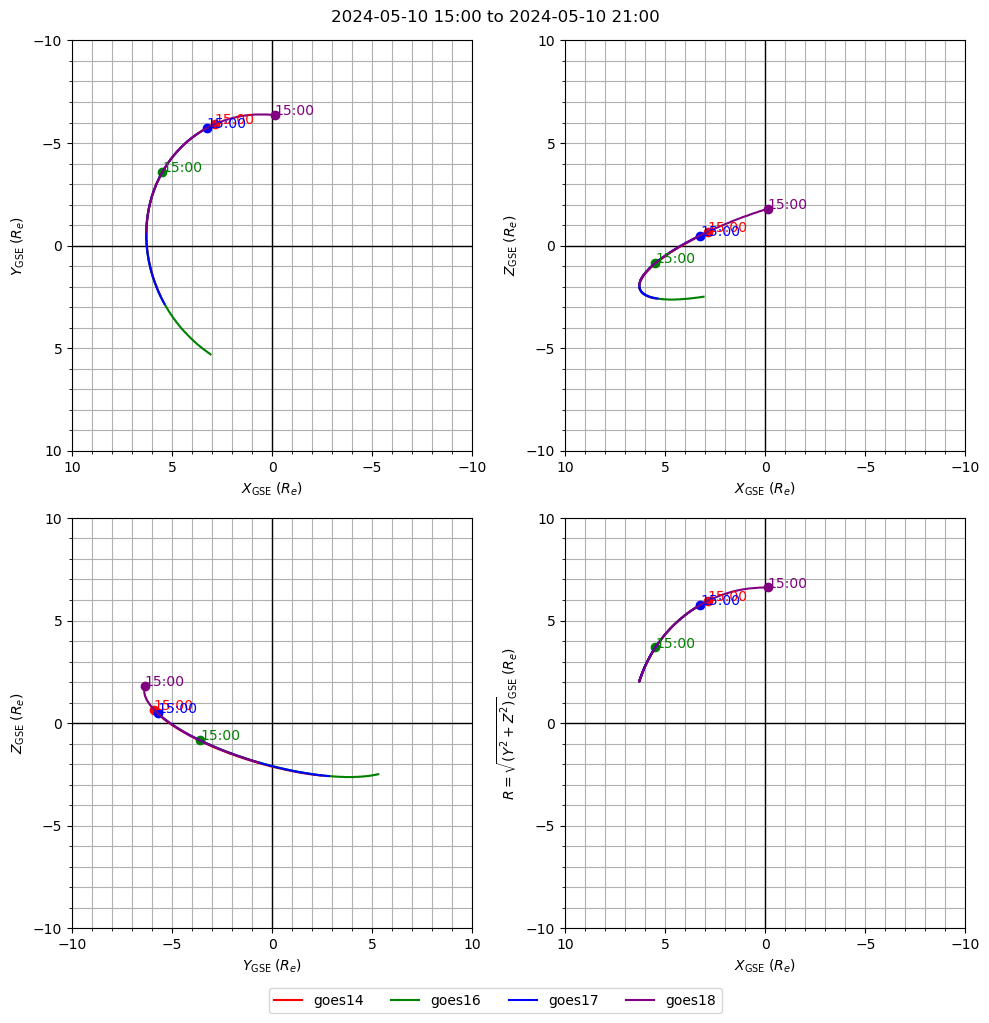

In [ ]:
labels = ['goes14', 'goes16', 'goes17', 'goes18']
colors = ['red', 'green', 'blue', 'purple']

fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(nrows=2, ncols=2)
axes = axes.flatten()
for ax in axes:
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
    ax.axvline(0, color='k', lw=1)
    ax.axhline(0, color='k', lw=1)
    ax.grid(True, which='both')

for i in range(len(labels)):
    lbl = labels[i]
    clr = colors[i]
    df_lbl = df[df['Sat'] == lbl]
    x_lbl = df_lbl['X_GSE (RE)']
    y_lbl = df_lbl['Y_GSE (RE)']
    z_lbl = df_lbl['Z_GSE (RE)']
    r_lbl = np.sqrt(y_lbl**2 + z_lbl**2)
    
    x0 = x_lbl.iloc[0]
    y0 = y_lbl.iloc[0]
    z0 = z_lbl.iloc[0]
    r0 = r_lbl.iloc[0]
    t0 = df_lbl.index[0]
    tf = df_lbl.index[-1]
    
    axes[0].plot(x_lbl, y_lbl, '-', label=lbl, color=clr)
    axes[0].plot(x0, y0, 'o', color=clr)
    axes[0].text(x0, y0, f"{t0.strftime('%H:%S')}", color=clr)
    axes[0].set_xlabel(r'$X_\text{GSE} \; (R_e)$')
    axes[0].set_ylabel(r'$Y_\text{GSE} \; (R_e)$')
    axes[0].xaxis.set_inverted(True)
    axes[0].yaxis.set_inverted(True)
    
    axes[1].plot(x_lbl, z_lbl, '-', label=lbl, color=clr)
    axes[1].plot(x0, z0, 'o', color=clr)
    axes[1].text(x0, z0, f"{t0.strftime('%H:%S')}", color=clr)
    axes[1].set_xlabel(r'$X_\text{GSE} \; (R_e)$')
    axes[1].set_ylabel(r'$Z_\text{GSE} \; (R_e)$')
    axes[1].xaxis.set_inverted(True)

    axes[2].plot(y_lbl, z_lbl, '-', label=lbl, color=clr)
    axes[2].plot(y0, z0, 'o', color=clr)
    axes[2].text(y0, z0, f"{t0.strftime('%H:%S')}", color=clr)
    axes[2].set_xlabel(r'$Y_\text{GSE} \; (R_e)$')
    axes[2].set_ylabel(r'$Z_\text{GSE} \; (R_e)$')

    axes[3].plot(x_lbl, r_lbl, '-', label=lbl, color=clr)
    axes[3].plot(x0, r0, 'o', color=clr)
    axes[3].text(x0, r0, f"{t0.strftime('%H:%S')}", color=clr)
    axes[3].set_xlabel(r'$X_\text{GSE} \; (R_e)$')
    axes[3].set_ylabel(r'$R=\sqrt{(Y^2+Z^2)}_\text{GSE} \; (R_e)$')
    axes[3].xaxis.set_inverted(True)

handles = []
for i in range(len(labels)):
    handles.append(mlines.Line2D([], [], color=colors[i]))
fig.suptitle(f"{t0.strftime('%Y-%m-%d %H:%M')} to {tf.strftime('%Y-%m-%d %H:%M')}")
fig.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=4)
fig.tight_layout()
plt.show()

In [ ]:
import spacepy.pybats
import spacepy.empiricals

In [ ]:
# NxMx2
# N is number of timesteps, M is number of local times. The 2 positions are the X_GSE and Y_GSE positions of the magnetopause
mp_loc_15 = spacepy.empiricals.getMagnetopause(ticks={"P": [5], "Bz": [0]}, LTs=np.arange(1, 23, 0.5))
mp_loc_18 = spacepy.empiricals.getMagnetopause(ticks={"P": [40], "Bz": [-40]}, LTs=np.arange(1, 23, 0.5))
mp_loc_15.shape

(2, 44, 2)

In [ ]:
np.allclose(mp_loc_15[0], mp_loc_15[1])

True

In [ ]:
np.where(df.index == pd.Timestamp('2024-05-10 15:00:00'))[0]

array([  0, 121, 482, 843])

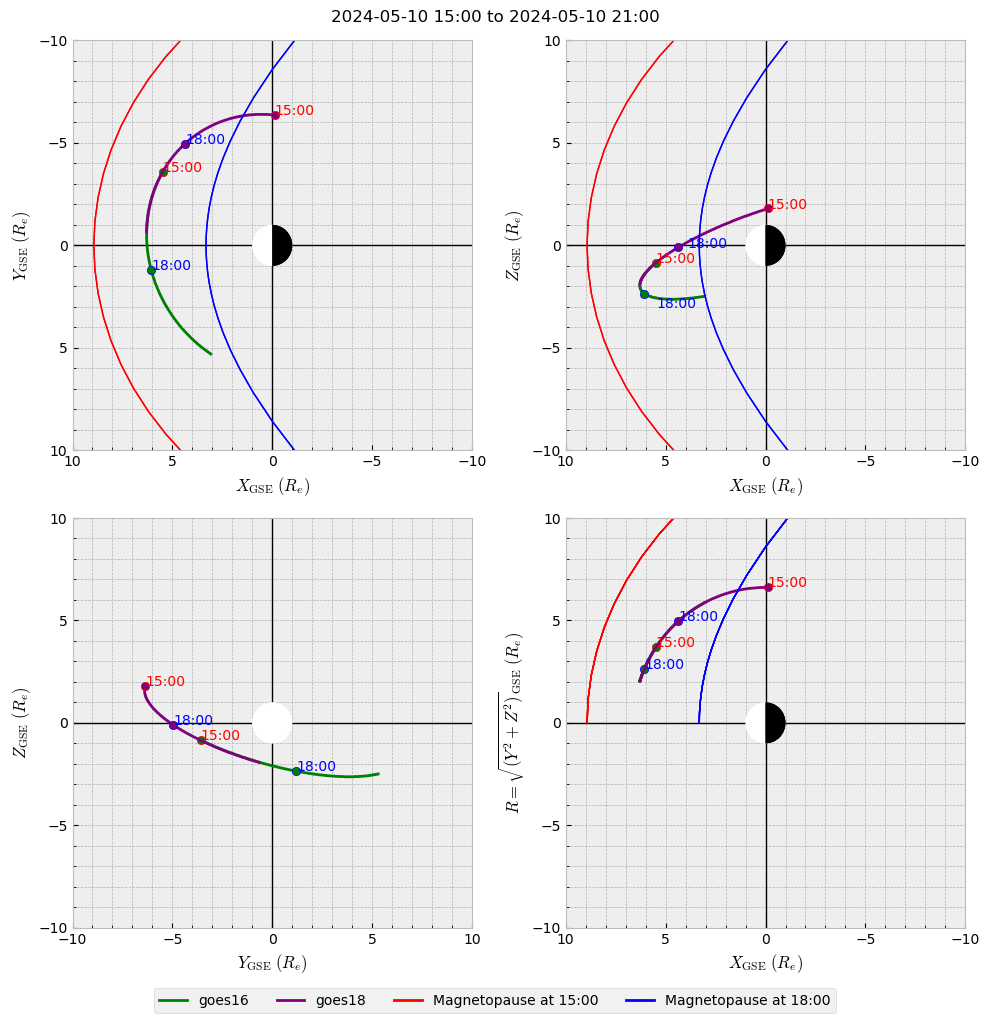

In [ ]:
labels = ['goes16', 'goes18']
colors = ['green', 'purple']

plt.style.use('bmh')
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(nrows=2, ncols=2)
axes = axes.flatten()
for ax in axes:
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax.yaxis.set_minor_locator(plt.MultipleLocator(1))
    ax.axvline(0, color='k', lw=1)
    ax.axhline(0, color='k', lw=1)
    ax.grid(True, which='both')

for i in range(len(labels)):
    lbl = labels[i]
    clr = colors[i]
    df_lbl = df[df['Sat'] == lbl]
    x_lbl = df_lbl['X_GSE (RE)']
    y_lbl = df_lbl['Y_GSE (RE)']
    z_lbl = df_lbl['Z_GSE (RE)']
    r_lbl = np.sqrt(y_lbl**2 + z_lbl**2)
    
    x0 = x_lbl.iloc[0]
    y0 = y_lbl.iloc[0]
    z0 = z_lbl.iloc[0]
    r0 = r_lbl.iloc[0]
    t0 = df_lbl.index[0]
    tf = df_lbl.index[-1]

    ts = np.where(df_lbl.index == pd.Timestamp('2024-05-10 18:00:00'))[0][0]
    
    axes[0].plot(x_lbl, y_lbl, '-', label=lbl, color=clr)
    axes[0].plot(x0, y0, 'o', markerfacecolor=clr, markeredgecolor='red', markeredgewidth=0.5)
    axes[0].text(x0, y0, f"{t0.strftime('%H:%S')}", color='red')
    axes[0].plot(x_lbl.iloc[ts], y_lbl.iloc[ts], 'o', markerfacecolor=clr, markeredgecolor='blue', markeredgewidth=0.5)
    axes[0].text(x_lbl.iloc[ts], y_lbl.iloc[ts], f"{df_lbl.index[ts].strftime('%H:%S')}", color='blue')
    axes[0].set_xlabel(r'$X_\text{GSE} \; (R_e)$')
    axes[0].set_ylabel(r'$Y_\text{GSE} \; (R_e)$')
    axes[0].xaxis.set_inverted(True)
    axes[0].yaxis.set_inverted(True)
    axes[0].plot(mp_loc_15[0, :, 0], mp_loc_15[0, :, 1], 'r-', lw=1)
    axes[0].plot(mp_loc_18[0, :, 0], mp_loc_18[0, :, 1], 'b-', lw=1)
    spacepy.pybats.add_planet(ax=axes[0])
    
    axes[1].plot(x_lbl, z_lbl, '-', label=lbl, color=clr)
    axes[1].plot(x0, z0, 'o', markerfacecolor=clr, markeredgecolor='red', markeredgewidth=0.5)
    axes[1].text(x0, z0, f"{t0.strftime('%H:%S')}", color='red')
    axes[1].plot(x_lbl.iloc[ts], z_lbl.iloc[ts], 'o', markerfacecolor=clr, markeredgecolor='blue', markeredgewidth=0.5)
    axes[1].text(0.9*x_lbl.iloc[ts], 1.3*z_lbl.iloc[ts], f"{df_lbl.index[ts].strftime('%H:%S')}", color='blue')
    axes[1].set_xlabel(r'$X_\text{GSE} \; (R_e)$')
    axes[1].set_ylabel(r'$Z_\text{GSE} \; (R_e)$')
    axes[1].xaxis.set_inverted(True)
    axes[1].plot(mp_loc_15[0, :, 0], mp_loc_15[0, :, 1], 'r-', lw=1)
    axes[1].plot(mp_loc_18[0, :, 0], mp_loc_18[0, :, 1], 'b-', lw=1)
    spacepy.pybats.add_planet(ax=axes[1])

    axes[2].plot(y_lbl, z_lbl, '-', label=lbl, color=clr)
    axes[2].plot(y0, z0, 'o', markerfacecolor=clr, markeredgecolor='red', markeredgewidth=0.5)
    axes[2].text(y0, z0, f"{t0.strftime('%H:%S')}", color='red')
    axes[2].plot(y_lbl.iloc[ts], z_lbl.iloc[ts], 'o', markerfacecolor=clr, markeredgecolor='blue', markeredgewidth=0.5)
    axes[2].text(y_lbl.iloc[ts], z_lbl.iloc[ts], f"{df_lbl.index[ts].strftime('%H:%S')}", color='blue')
    axes[2].set_xlabel(r'$Y_\text{GSE} \; (R_e)$')
    axes[2].set_ylabel(r'$Z_\text{GSE} \; (R_e)$')
    spacepy.pybats.add_planet(ax=axes[2], add_night=False)

    axes[3].plot(x_lbl, r_lbl, '-', label=lbl, color=clr)
    axes[3].plot(x0, r0, 'o', markerfacecolor=clr, markeredgecolor='red', markeredgewidth=0.5)
    axes[3].text(x0, r0, f"{t0.strftime('%H:%S')}", color='red')
    axes[3].plot(x_lbl.iloc[ts], r_lbl.iloc[ts], 'o', markerfacecolor=clr, markeredgecolor='blue', markeredgewidth=0.5)
    axes[3].text(x_lbl.iloc[ts], r_lbl.iloc[ts], f"{df_lbl.index[ts].strftime('%H:%S')}", color='blue')
    axes[3].set_xlabel(r'$X_\text{GSE} \; (R_e)$')
    axes[3].set_ylabel(r'$R=\sqrt{(Y^2+Z^2)}_\text{GSE} \; (R_e)$')
    axes[3].plot(mp_loc_15[0, :, 0], np.abs(mp_loc_15[0, :, 1]), 'r-', lw=1)
    axes[3].plot(mp_loc_18[0, :, 0], np.abs(mp_loc_18[0, :, 1]), 'b-', lw=1)
    axes[3].xaxis.set_inverted(True)
    spacepy.pybats.add_planet(ax=axes[3])

handles = [
    mlines.Line2D([], [], color=colors[0]),
    mlines.Line2D([], [], color=colors[1]),
    mlines.Line2D([], [], color='red', linestyle='-'),
    mlines.Line2D([], [], color='blue', linestyle='-'),
]
fig.suptitle(f"{t0.strftime('%Y-%m-%d %H:%M')} to {tf.strftime('%Y-%m-%d %H:%M')}")
fig.legend(handles=handles, labels=labels+['Magnetopause at 15:00', 'Magnetopause at 18:00'], loc='lower center', bbox_to_anchor=(0.5, -0.03), ncol=4)
fig.tight_layout()
plt.show()